# Healthcare - Persistency of A Drug
- Business Understanding
- Data understanding
- Exploratory data Analysis
- Data Preparation
- Model Building ( Logistic Regression, ensemble, Boosting etc)
- Model Selection
- Performance reporting
- Deploy the model
- Converting ML metrics into Business metric and explaining result to business
- Prepare presentation for non technical persons.

## 1. Business Understanding
One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem, ABC pharma company approached an analytics company to automate this process of identification.

With an objective to gather insights on the factors that are impacting the persistency, I will build a classification for the given dataset.

Target Variable: Persistency_Flag

- Rx Date: The date you received the prescription from your doctor.

## 2. Data Understanding

### 2.1 Data Loading

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from scipy.stats import kstest

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set pandas options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Upload required file from google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/MyDrive/DG/Healthcare_dataset.csv')

In [ ]:
df.shape

(3424, 69)

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


### 2.2 Data Processing

In [ ]:
# Review data types

df.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

In [ ]:
# Missing values

df.isnull().sum()

Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

In [ ]:
# Review patient ID

df['Ptid'].nunique()

3424

In [ ]:
# Replace the target variable

df['Persistency_Flag'] = df['Persistency_Flag'].str.replace('Non-Persistent', '0')
df['Persistency_Flag'] = df['Persistency_Flag'].str.replace('Persistent', '1')
#df['Persistency_Flag'] = pd.to_numeric(df['Persistency_Flag'])

df['Persistency_Flag'].head()

0    1
1    0
2    0
3    0
4    0
Name: Persistency_Flag, dtype: object

The data provides individual information of 3424 patients, including their patient ID, their being persistent situations, demographics, provider atrributes, clinic factors and disease/treatment factors.

## 3. Exploratory Data Analysis

### 3.1 Descriptive Analysis

In [ ]:
df_cat = df.drop(columns=df[['Ptid', 'Dexa_Freq_During_Rx', 'Count_Of_Risks']])
len(df_cat.columns)

66

In [ ]:
# Categorical: cardinality

df_cat.nunique()

Persistency_Flag                                                       2
Gender                                                                 2
Race                                                                   4
Ethnicity                                                              3
Region                                                                 5
Age_Bucket                                                             4
Ntm_Speciality                                                        36
Ntm_Specialist_Flag                                                    2
Ntm_Speciality_Bucket                                                  3
Gluco_Record_Prior_Ntm                                                 2
Gluco_Record_During_Rx                                                 2
Dexa_During_Rx                                                         2
Frag_Frac_Prior_Ntm                                                    2
Frag_Frac_During_Rx                                

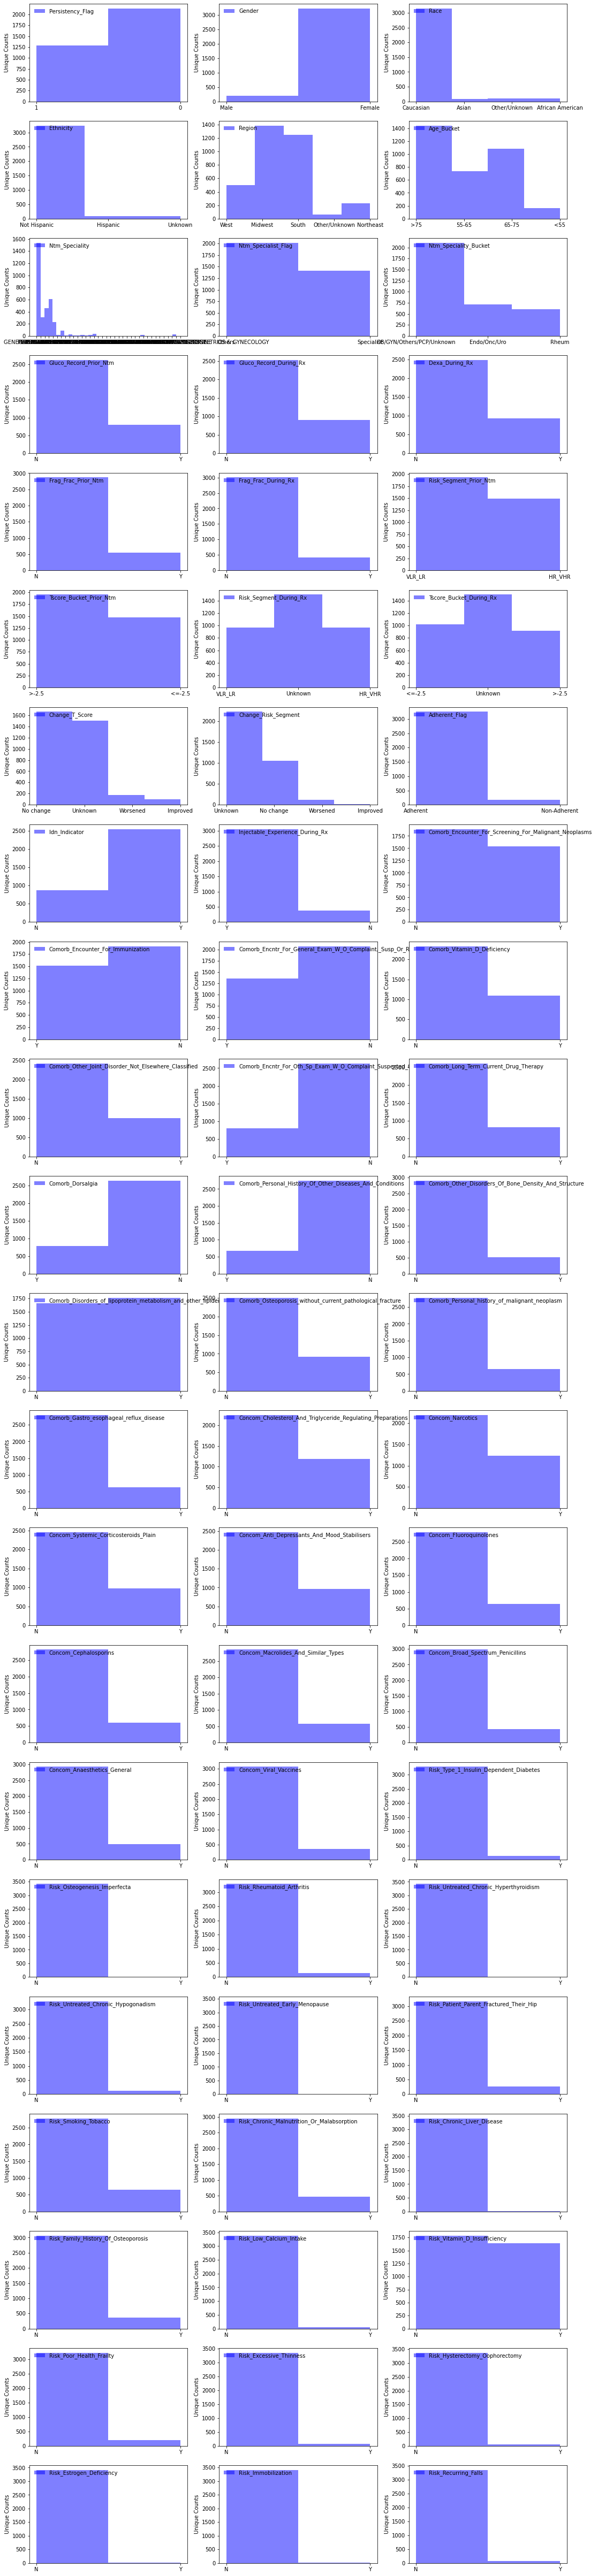

In [ ]:
# Categorical: Unique Counts

fig, axes = plt.subplots(22, 3, figsize=(18, 88))

counter = 0
for i in range(22):
    for j in range(3):
        ax = axes[i][j]
        # Plot when we have data
        if counter < len(df.columns):
            bins = df_cat[df_cat.columns[counter]].nunique()
            ax.hist(df_cat[df_cat.columns[counter]], bins, color='blue', alpha=0.5,
                    label='{}'.format(df_cat.columns[counter]))
            ax.set_xlabel('')
            ax.set_ylabel('Unique Counts')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [ ]:
# Numerical: descriptive statistics

df_num = df[['Dexa_Freq_During_Rx', 'Count_Of_Risks']]
df_num.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


There are 460 outliers of Dexa_Freq_During_Rx.
There are 8 outliers of Count_Of_Risks.
There are 0 duplicated outliers of two variables.


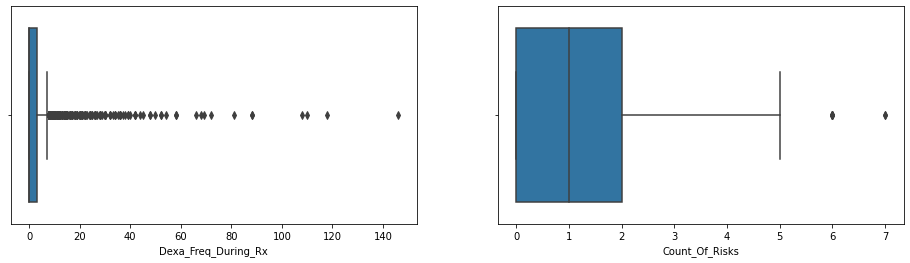

In [ ]:
# Numerical: outliers revision

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(df_num['Dexa_Freq_During_Rx'], ax=ax1)
sns.boxplot(df_num['Count_Of_Risks'], ax=ax2)

print('There are', str(len(np.where(df_num['Dexa_Freq_During_Rx']>7.5)[0])), 'outliers of Dexa_Freq_During_Rx.')
print('There are', str(len(np.where(df_num['Count_Of_Risks']>5)[0])), 'outliers of Count_Of_Risks.')
print('There are', str(len(np.where((df_num['Dexa_Freq_During_Rx']>7.5) & (df_num['Count_Of_Risks']>5))[0])), 'duplicated outliers of two variables.')

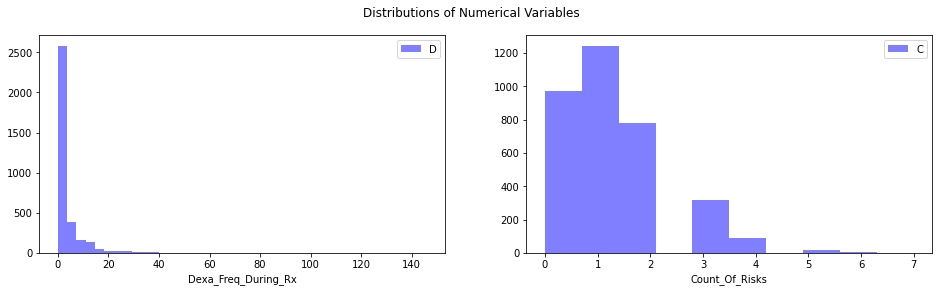

In [ ]:
# Numerical: distributions revision

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Distributions of Numerical Variables')

ax1.hist(df_num['Dexa_Freq_During_Rx'], bins=40, color='blue', alpha=0.5);
ax1.set_ylabel('');
ax1.set_xlabel('Dexa_Freq_During_Rx');
ax1.legend('Dexa_Freq_During_Rx');
ax2.hist(df_num['Count_Of_Risks'], bins=10, color='blue', alpha=0.5);
ax2.set_xlabel('Count_Of_Risks');
ax2.legend('Count_Of_Risks');

After basic processing, we now have 66 categorical variables (including target variables), and 2 numerical variables.

The data dose not include missing values. Especially for numerical data, we totally have 468 outliers if we define the observations with numerical value larger than upper fence as outliers. And the two columns of numerical data are overall left-skewed, close to zero.

Refer to this analysis, I decided not to drop any outliers becasue above=found outliers are based on only two dependent variables to remain the authenticitity of data. (I have also tried modeling both with these outliers and without these outliers, and the results were similar.)

### 3.2 Correlation Analysis

In [ ]:
# Categorical: Chi-Square Test

from scipy.stats import chi2_contingency

for i in range(len(df_cat.columns)):
  for j in range(len(df_cat.columns)):
    c, p, dof, expected = chi2_contingency(pd.crosstab(df_cat[df_cat.columns[i]], df_cat[df_cat.columns[j]], margins=True))
    if p < 0.05:
      print(df_cat.columns[i], "& ", df_cat.columns[j], "p_value: ", round(p,3))
    else:
      pass

Persistency_Flag &  Persistency_Flag p_value:  0.0
Persistency_Flag &  Region p_value:  0.001
Persistency_Flag &  Ntm_Speciality p_value:  0.0
Persistency_Flag &  Ntm_Specialist_Flag p_value:  0.0
Persistency_Flag &  Ntm_Speciality_Bucket p_value:  0.0
Persistency_Flag &  Gluco_Record_During_Rx p_value:  0.0
Persistency_Flag &  Dexa_During_Rx p_value:  0.0
Persistency_Flag &  Frag_Frac_During_Rx p_value:  0.0
Persistency_Flag &  Risk_Segment_During_Rx p_value:  0.0
Persistency_Flag &  Tscore_Bucket_During_Rx p_value:  0.0
Persistency_Flag &  Change_T_Score p_value:  0.0
Persistency_Flag &  Change_Risk_Segment p_value:  0.0
Persistency_Flag &  Adherent_Flag p_value:  0.0
Persistency_Flag &  Idn_Indicator p_value:  0.0
Persistency_Flag &  Injectable_Experience_During_Rx p_value:  0.0
Persistency_Flag &  Comorb_Encounter_For_Screening_For_Malignant_Neoplasms p_value:  0.0
Persistency_Flag &  Comorb_Encounter_For_Immunization p_value:  0.0
Persistency_Flag &  Comorb_Encntr_For_General_Exam

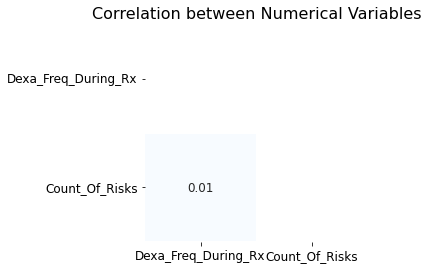

In [ ]:
# Numerical: Heatmap

corr = df_num.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['font.size'] = 12
plt.figure(figsize = (4,4))
ax = sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5, mask=mask, cmap='Blues', cbar=False)
plt.title('Correlation between Numerical Variables', fontsize=16, x=0.5, y=1)
plt.xticks(rotation=0)
plt.show()

In [ ]:
#df_cat['Gender'].unique()[1]
#df[df_cat.columns[0]].head()
#df[df_cat.columns[0]].unique()[0]
#df[df_cat.columns[0]].unique()
#str(df[df_cat.columns[0]].unique()[0])
#df_num.columns[0]
#df[df_cat.columns[0]].unique()[0]
#df_num.columns[0]
#df_cat.columns[0]

In [ ]:
from pandas.core.algorithms import value_counts
# Categorical & Numerical: ANOVA Test

import scipy.stats as stats

#fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Profit'],
#                                df.query('Company=="Yellow Cab"')['Profit'])
#print("p_value: ",round(pvalue,3))

fvalue, pvalue = stats.f_oneway(df[df['Persistency_Flag']=='Persistent']['Dexa_Freq_During_Rx'],
                                df[df['Persistency_Flag']=='Non-Persistent']['Dexa_Freq_During_Rx'])
print(df_cat.columns[0], "& ", df_num.columns[0], "p_value: ", round(pvalue,3))

Persistency_Flag &  Dexa_Freq_During_Rx p_value:  nan


In [ ]:
from pandas.core.algorithms import value_counts
# Categorical & Numerical: ANOVA Test

import scipy.stats as stats

#fvalue, pvalue = stats.f_oneway(df.query('Company=="Pink Cab"')['Profit'],
#                                df.query('Company=="Yellow Cab"')['Profit'])
#print("p_value: ",round(pvalue,3))

fvalue, pvalue = stats.f_oneway(df[df[df_cat.columns[0]]==df[df_cat.columns[0]].unique()[0]][df_num.columns[0]],
                                df[df[df_cat.columns[0]]==df[df_cat.columns[0]].unique()[1]][df_num.columns[0]])
print(df_cat.columns[0], "& ", df_num.columns[0], "p_value: ", round(pvalue,3))

Persistency_Flag &  Dexa_Freq_During_Rx p_value:  0.0


In [ ]:
# Categorical & Numerical: ANOVA Test

from pandas.core.algorithms import value_counts
import scipy.stats as stats

for i in range(len(df_cat.columns)):
  for j in range(len(df_num.columns)):
#   for k in range(len(df[df_cat.columns[i]].unique())): 
#   for val in df[df_cat.columns[i]].unique():
    if len(df[df_cat.columns[i]].unique()) == 2:
      fvalue, pvalue = stats.f_oneway(df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[0]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[1]][df_num.columns[j]])
      if pvalue < 0.05:
        print(df_cat.columns[i], "& ", df_num.columns[j], "p_value: ", round(pvalue,3))
      else:
        pass

    elif len(df[df_cat.columns[i]].unique()) == 3:
      fvalue, pvalue = stats.f_oneway(df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[0]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[1]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[2]][df_num.columns[j]])
      if pvalue < 0.05:
        print(df_cat.columns[i], "& ", df_num.columns[j], "p_value: ", round(pvalue,3))
      else:
        pass

    elif len(df[df_cat.columns[i]].unique()) == 4:
      fvalue, pvalue = stats.f_oneway(df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[0]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[1]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[2]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[3]][df_num.columns[j]])
      if pvalue < 0.05:
        print(df_cat.columns[i], "& ", df_num.columns[j], "p_value: ", round(pvalue,3))
      else:
        pass
    
    elif len(df[df_cat.columns[i]].unique()) == 5:
      fvalue, pvalue = stats.f_oneway(df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[0]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[1]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[2]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[3]][df_num.columns[j]],
                                      df[df[df_cat.columns[i]]==df[df_cat.columns[i]].unique()[4]][df_num.columns[j]])
      if pvalue < 0.05:
        print(df_cat.columns[i], "& ", df_num.columns[j], "p_value: ", round(pvalue,3))
      else:
        pass
    
    else: # NTM_Specialty - 36
      pass


Persistency_Flag &  Dexa_Freq_During_Rx p_value:  0.0
Persistency_Flag &  Count_Of_Risks p_value:  0.0
Ethnicity &  Count_Of_Risks p_value:  0.003
Region &  Dexa_Freq_During_Rx p_value:  0.0
Region &  Count_Of_Risks p_value:  0.0
Ntm_Specialist_Flag &  Dexa_Freq_During_Rx p_value:  0.002
Ntm_Specialist_Flag &  Count_Of_Risks p_value:  0.0
Ntm_Speciality_Bucket &  Dexa_Freq_During_Rx p_value:  0.001
Ntm_Speciality_Bucket &  Count_Of_Risks p_value:  0.0
Gluco_Record_Prior_Ntm &  Count_Of_Risks p_value:  0.0
Gluco_Record_During_Rx &  Dexa_Freq_During_Rx p_value:  0.0
Gluco_Record_During_Rx &  Count_Of_Risks p_value:  0.0
Dexa_During_Rx &  Dexa_Freq_During_Rx p_value:  0.0
Dexa_During_Rx &  Count_Of_Risks p_value:  0.0
Frag_Frac_Prior_Ntm &  Dexa_Freq_During_Rx p_value:  0.0
Frag_Frac_Prior_Ntm &  Count_Of_Risks p_value:  0.0
Frag_Frac_During_Rx &  Dexa_Freq_During_Rx p_value:  0.0
Frag_Frac_During_Rx &  Count_Of_Risks p_value:  0.0
Risk_Segment_Prior_Ntm &  Dexa_Freq_During_Rx p_value:  0

## 4. Variable Selection & Model Building

In [ ]:
# Persistency_Flag VS. Other categorical variables: Chi-Square Test

from scipy.stats import chi2_contingency

cat_list = []

#for i in range(len(df_cat.columns)):
for j in range(len(df_cat.drop(columns = ['Persistency_Flag']).columns)):
  c, p, dof, expected = chi2_contingency(pd.crosstab(df_cat['Persistency_Flag'],
                                                     df_cat.drop(columns = ['Persistency_Flag'])[df_cat.drop(columns = ['Persistency_Flag']).columns[j]], margins=True))
  if p < 0.05:
    #print(df.columns[i], "& ", df.columns[j], "p_value: ", round(p,3))
    #print(df_cat.drop(columns = ['Persistency_Flag']).columns[j], "p_value: ", round(p,3))
    cat_list.append(df_cat.drop(columns = ['Persistency_Flag']).columns[j])
  else:
    pass

cat_list

['Region',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_During_Rx',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neopl

In [ ]:
len(cat_list)

42

In [ ]:
# Persistency_Flag VS. Numerical variables: ANOVA Test
from pandas.core.algorithms import value_counts
import scipy.stats as stats

num_list = []

for j in range(len(df_num.columns)):
  fvalue, pvalue = stats.f_oneway(df[df['Persistency_Flag']=='1'][df_num.columns[j]],
                                  df[df['Persistency_Flag']=='0'][df_num.columns[j]])
  if pvalue < 0.05:
    #print(df_num.columns[j], "p_value: ", round(pvalue,3))
    num_list.append(df_num.columns[j])
  else:
    pass

num_list

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [ ]:
# Fit the model: Split train and test datasets

X = pd.get_dummies(df[cat_list + num_list])
y = pd.to_numeric(df['Persistency_Flag'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape

(2396, 130)

In [ ]:
X_test.shape

(1028, 130)

In [ ]:
X_test.head()

,Dexa_Freq_During_Rx,Count_Of_Risks,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_HOSPITAL MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NEUROLOGY,Ntm_Speciality_NUCLEAR MEDICINE,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_PLASTIC SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY AND NEUROLOGY,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Ntm_Specialist_Flag_Others,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,Gluco_Record_During_Rx_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_N,Dexa_During_Rx_Y,Frag_Frac_During_Rx_N,Frag_Frac_During_Rx_Y,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_During_Rx__=-2.5,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Idn_Indicator_N,Idn_Indicator_Y,Injectable_Experience_During_Rx_N,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_N,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Vitamin_D_Deficiency_N,Comorb_Vitamin_D_Deficiency_Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_N,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_N,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_N,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Personal_history_of_malignant_neoplasm_Y,Comorb_Gastro_esophageal_reflux_disease_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_N,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_N,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_N,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_N,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_N,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_N,Concom_Cephalospo

In [ ]:
# Actual prediction results
len(y[y==1])/len(y)

0.3764602803738318

## 5. Model Performance & Selection

### 5.1 Logistic Regression

Train/Test split results:
LogisticRegression accuracy is 0.832
LogisticRegression log_loss is 0.383
LogisticRegression auc is 0.898
Ks_2sampResult(statistic=0.6493995591547655, pvalue=3.56829391131958e-89)


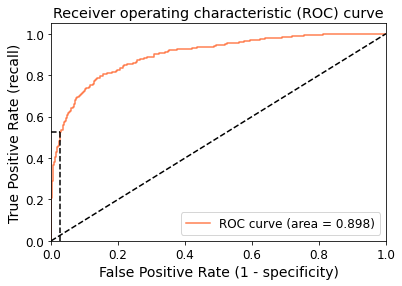

Using a threshold of 0.799 guarantees a sensitivity of 0.524 and a specificity of 0.973, i.e. a false positive rate of 2.67%.


In [ ]:
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results
len(y_pred[y_pred==1])/len(y_pred)

0.35992217898832685

In [ ]:
# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": np.logspace(-3,3,7),
    "penalty": ["l1","l2"]
}

log_cv = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)
log_cv.fit(X_train,y_train)
print(log_cv.best_params_)
logreg_2 = LogisticRegression(**log_cv.best_params_)
logreg_2.fit(X_train,y_train)

{'C': 0.1, 'penalty': 'l2'}


LogisticRegression(C=0.1)

Train/Test split results:
LogisticRegression accuracy is 0.831
LogisticRegression log_loss is 0.386
LogisticRegression auc is 0.898
Ks_2sampResult(statistic=0.6462598417293339, pvalue=2.5618245343872033e-88)


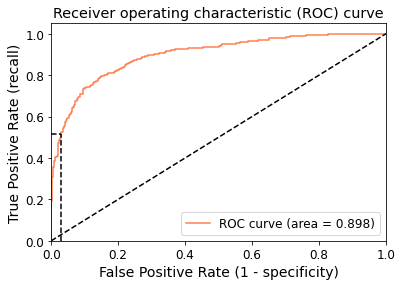

Using a threshold of 0.777 guarantees a sensitivity of 0.517 and a specificity of 0.972, i.e. a false positive rate of 2.83%.


In [ ]:
# Updated prediction results

y_pred = logreg_2.predict(X_test)
y_pred_proba = logreg_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.2 Decision Tree

Train/Test split results:
DecisionTreeClassifier accuracy is 0.723
DecisionTreeClassifier log_loss is 9.576
DecisionTreeClassifier auc is 0.706
Ks_2sampResult(statistic=0.4123388485829114, pvalue=3.315678828996256e-36)


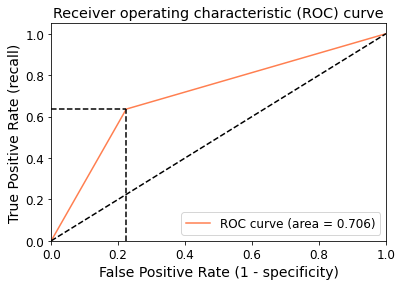

Using a threshold of 1.000 guarantees a sensitivity of 0.637 and a specificity of 0.776, i.e. a false positive rate of 22.45%.


In [ ]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.38132295719844356

In [ ]:
# Hyperparameters tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_cv = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)
dt_2 = DecisionTreeClassifier(**dt_cv.best_params_)
dt_2.fit(X_train,y_train)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)

Train/Test split results:
DecisionTreeClassifier accuracy is 0.809
DecisionTreeClassifier log_loss is 0.456
DecisionTreeClassifier auc is 0.844
Ks_2sampResult(statistic=0.5698346228123357, pvalue=9.274967993773765e-69)


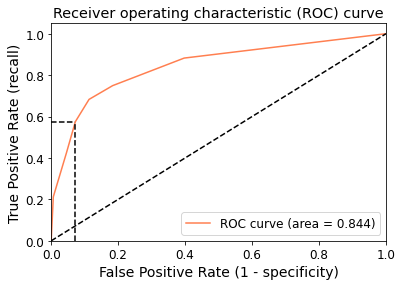

Using a threshold of 0.689 guarantees a sensitivity of 0.575 and a specificity of 0.928, i.e. a false positive rate of 7.22%.


In [ ]:
# Updated prediction results

y_pred = dt_2.predict(X_test)
y_pred_proba = dt_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.3 Random Forest

Train/Test split results:
RandomForestClassifier accuracy is 0.838
RandomForestClassifier log_loss is 0.407
RandomForestClassifier auc is 0.894
Ks_2sampResult(statistic=0.6471230632721316, pvalue=1.4913969712788127e-88)


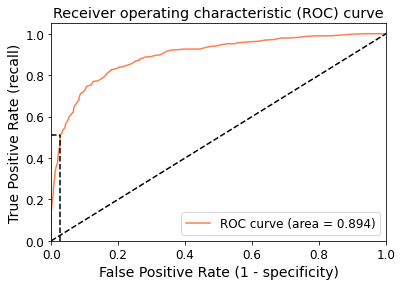

Using a threshold of 0.700 guarantees a sensitivity of 0.512 and a specificity of 0.973, i.e. a false positive rate of 2.67%.


In [ ]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.34824902723735407

In [ ]:
# Hyperparameters tuning

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)
rf_2 = RandomForestClassifier(**rf_cv.best_params_)
rf_2.fit(X_train,y_train)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


RandomForestClassifier(max_depth=8, n_estimators=500)

Train/Test split results:
RandomForestClassifier accuracy is 0.828
RandomForestClassifier log_loss is 0.406
RandomForestClassifier auc is 0.897
Ks_2sampResult(statistic=0.6606696190181758, pvalue=2.7883160268652483e-92)


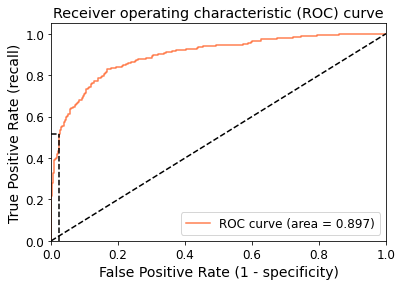

Using a threshold of 0.680 guarantees a sensitivity of 0.514 and a specificity of 0.976, i.e. a false positive rate of 2.35%.


In [ ]:
# Updated prediction results

y_pred = rf_2.predict(X_test)
y_pred_proba = rf_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.4 XGBoost

Train/Test split results:
XGBClassifier accuracy is 0.843
XGBClassifier log_loss is 0.381
XGBClassifier auc is 0.902
Ks_2sampResult(statistic=0.6662424166991211, pvalue=7.747957191101573e-94)


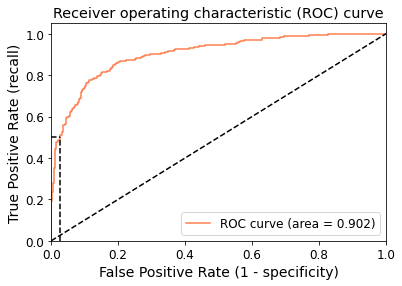

Using a threshold of 0.811 guarantees a sensitivity of 0.501 and a specificity of 0.975, i.e. a false positive rate of 2.51%.


In [ ]:
# 4. XGBoost

from xgboost import XGBClassifier

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(xgb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(xgb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.3540856031128405

In [ ]:
# Hyperparameters tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200,500],
    'max_depth':[4,8,12]
}

xgb_cv = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)
xgb_2 = XGBClassifier(**xgb_cv.best_params_)
xgb_2.fit(X_train, y_train)

{'max_depth': 4, 'n_estimators': 100}


XGBClassifier(max_depth=4)

Train/Test split results:
XGBClassifier accuracy is 0.838
XGBClassifier log_loss is 0.379
XGBClassifier auc is 0.902
Ks_2sampResult(statistic=0.6616051102715333, pvalue=1.531183443121389e-92)


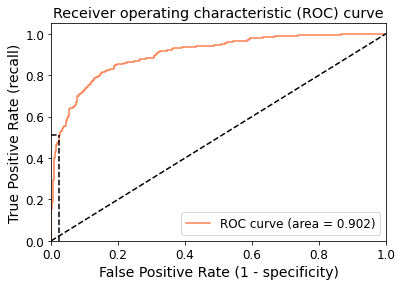

Using a threshold of 0.826 guarantees a sensitivity of 0.512 and a specificity of 0.976, i.e. a false positive rate of 2.35%.


In [ ]:
# Updated prediction results

y_pred = xgb_2.predict(X_test)
y_pred_proba = xgb_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(xgb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(xgb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.5 Neural Network (NN)

Train/Test split results:
MLPClassifier accuracy is 0.831
MLPClassifier log_loss is 0.408
MLPClassifier auc is 0.892
Ks_2sampResult(statistic=0.6470909434007717, pvalue=1.5217434041519343e-88)


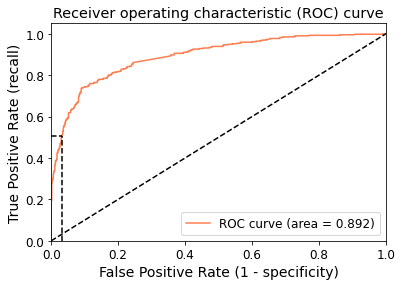

Using a threshold of 0.836 guarantees a sensitivity of 0.504 and a specificity of 0.969, i.e. a false positive rate of 3.14%.


In [ ]:
# 5. Neural Network

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
#nn = MLPClassifier(max_iter=100)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
y_pred_proba = nn.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(nn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(nn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(nn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.37062256809338523

In [ ]:
# Hyperparameters tuning: 16 mins

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#nn_cv = GridSearchCV(nn, param_grid, n_jobs = -1, cv = 5)
nn_cv = GridSearchCV(estimator = nn, param_grid = param_grid, cv = 5)
nn_cv.fit(X_train, y_train)
print(nn_cv.best_params_)
nn_2 = MLPClassifier(**nn_cv.best_params_)
nn_2.fit(X_train, y_train)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), solver='sgd')

Train/Test split results:
MLPClassifier accuracy is 0.832
MLPClassifier log_loss is 0.390
MLPClassifier auc is 0.895
Ks_2sampResult(statistic=0.6444089341422188, pvalue=8.152331546538017e-88)


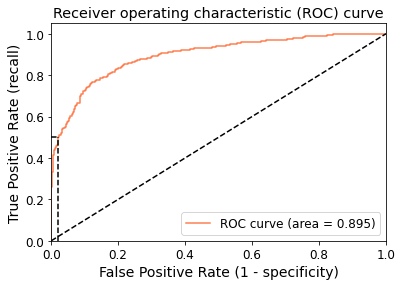

Using a threshold of 0.816 guarantees a sensitivity of 0.501 and a specificity of 0.980, i.e. a false positive rate of 2.04%.


In [ ]:
# Updated prediction results

y_pred = nn_2.predict(X_test)
y_pred_proba = nn_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(nn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(nn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(nn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.6 K-Nearest Neighbors (KNN)

Train/Test split results:
KNeighborsClassifier accuracy is 0.801
KNeighborsClassifier log_loss is 2.080
KNeighborsClassifier auc is 0.838
Ks_2sampResult(statistic=0.578755917082552, pvalue=6.470035537568918e-71)


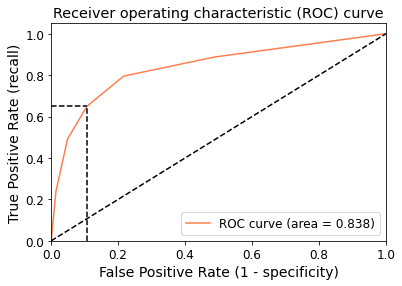

Using a threshold of 0.600 guarantees a sensitivity of 0.650 and a specificity of 0.893, i.e. a false positive rate of 10.68%.


In [ ]:
# 6. K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=100)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(knn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(knn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.3132295719844358

In [ ]:
# Hyperparameters tuning: 2 mins

from sklearn.model_selection import GridSearchCV
param_grid = {
    'leaf_size': list(range(1,50,10)),
    'n_neighbors': list(range(1,100,5)),
    'p': [1,2]
}

knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
knn_2 = KNeighborsClassifier(**knn_cv.best_params_)
knn_2.fit(X_train, y_train)

{'leaf_size': 1, 'n_neighbors': 21, 'p': 2}


KNeighborsClassifier(leaf_size=1, n_neighbors=21)

Train/Test split results:
KNeighborsClassifier accuracy is 0.812
KNeighborsClassifier log_loss is 0.694
KNeighborsClassifier auc is 0.880
Ks_2sampResult(statistic=0.6470186736902118, pvalue=1.592293879126076e-88)


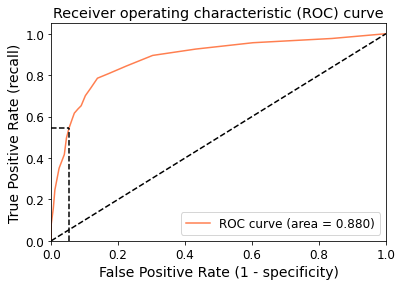

Using a threshold of 0.667 guarantees a sensitivity of 0.545 and a specificity of 0.947, i.e. a false positive rate of 5.34%.


In [ ]:
# 5. K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

y_pred = knn_2.predict(X_test)
y_pred_proba = knn_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(knn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(knn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 5.7 Support Vector Machines (SVM)

Train/Test split results:
SVC accuracy is 0.831
SVC log_loss is 0.393
SVC auc is 0.894
Ks_2sampResult(statistic=0.6375473266229569, pvalue=5.786419131354042e-86)


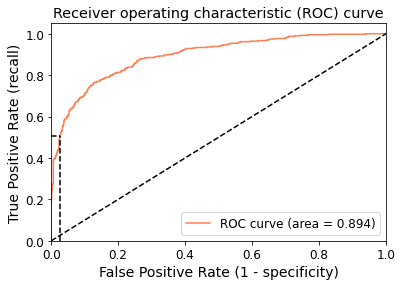

Using a threshold of 0.781 guarantees a sensitivity of 0.506 and a specificity of 0.975, i.e. a false positive rate of 2.51%.


In [ ]:
# 7. Support Vector Machines (SVM)

from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(svm.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(svm.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(svm.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Predicted results

len(y_pred[y_pred==1])/len(y_pred)

0.3531128404669261

In [ ]:
# Hyperparameters tuning: 16 mins

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

svm_cv = GridSearchCV(estimator = svm, param_grid = param_grid, cv = 5)
svm_cv.fit(X_train, y_train)
print(svm_cv.best_params_)
svm_2 = SVC(**svm_cv.best_params_, probability=True)
svm_2.fit(X_train, y_train)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=10, gamma=0.01, probability=True)

Train/Test split results:
SVC accuracy is 0.826
SVC log_loss is 0.404
SVC auc is 0.890
Ks_2sampResult(statistic=0.6353230255312827, pvalue=2.281549826491141e-85)


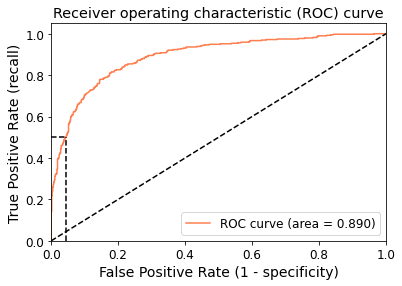

Using a threshold of 0.745 guarantees a sensitivity of 0.501 and a specificity of 0.956, i.e. a false positive rate of 4.40%.


In [ ]:
# Updated prediction results

y_pred = svm_2.predict(X_test)
y_pred_proba = svm_2.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

# print the accuracy results
print('Train/Test split results:')
print(svm.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(svm.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(svm.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# Calculates the K-statistic from within the model
df_1 = pd.DataFrame(y_test)
df_1 = df_1.rename(columns={'Persistency_Flag': 'Persistent'})
df_1.reset_index(drop=True, inplace=True)
df_2 = pd.DataFrame(y_pred_proba)
df_2 = df_2.rename(columns={0: 'prob'})
df_ks = pd.concat([df_1, df_2], axis=1)
class0 = df_ks.copy()
class0 = class0[class0['Persistent']==0]
class1 = df_ks.copy()
class1 = class1[class1['Persistent']==1]

print(str(stats.ks_2samp(class0['prob'], class1['prob'])))

# draw the AUC curve
idx = np.min(np.where(tpr > 0.5)) # index of the first threshold for which the sensibility > 0.5

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# print the sensitivity and specificity
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## 6. Conclusions & Model Deployment

- Logistic Regression: 
LogisticRegression auc is 0.898
Ks_2sampResult(statistic=0.6493995591547655, pvalue=3.56829391131958e-89)
LogisticRegression auc is 0.898
Ks_2sampResult(statistic=0.6462598417293339, pvalue=2.5618245343872033e-88)
- Decision Tree: 
DecisionTreeClassifier auc is 0.706
Ks_2sampResult(statistic=0.4123388485829114, pvalue=3.315678828996256e-36)
DecisionTreeClassifier auc is 0.844
Ks_2sampResult(statistic=0.5698346228123357, pvalue=9.274967993773765e-69)
- Random Forest: 
RandomForestClassifier auc is 0.894
Ks_2sampResult(statistic=0.6471230632721316, pvalue=1.4913969712788127e-88)
RandomForestClassifier auc is 0.897
Ks_2sampResult(statistic=0.6606696190181758, pvalue=2.7883160268652483e-92)
- Xgboost: 
XGBClassifier auc is 0.902
Ks_2sampResult(statistic=0.6662424166991211, pvalue=7.747957191101573e-94)
XGBClassifier auc is 0.902
Ks_2sampResult(statistic=0.6616051102715333, pvalue=1.531183443121389e-92)
- Neural Network: 
MLPClassifier auc is 0.892
Ks_2sampResult(statistic=0.6470909434007717, pvalue=1.5217434041519343e-88)
MLPClassifier auc is 0.895
Ks_2sampResult(statistic=0.6444089341422188, pvalue=8.152331546538017e-88)
- Knn: 
KNeighborsClassifier auc is 0.838
Ks_2sampResult(statistic=0.578755917082552, pvalue=6.470035537568918e-71)
KNeighborsClassifier auc is 0.880
Ks_2sampResult(statistic=0.6470186736902118, pvalue=1.592293879126076e-88)
- Svm:
SVC auc is 0.894
Ks_2sampResult(statistic=0.6375473266229569, pvalue=5.786419131354042e-86)
SVC auc is 0.890
Ks_2sampResult(statistic=0.6353230255312827, pvalue=2.281549826491141e-85)

Therefore, here we can find the best model which is the XGBoost. To better service the project, we decide to deploy the XGBoost model.

In [ ]:
# Direct Work Directory

%cd /content/gdrive/MyDrive/DG/

/content/gdrive/MyDrive/DG


In [ ]:
for i in cat_list + num_list:
  print(i, ":", df[cat_list + num_list][i].unique())

Region : ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Ntm_Speciality : ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'
 'VASCULAR SURGERY' 'CARDIOLOGY' 'NUCLEAR MEDICINE']
Ntm_Specialist_Flag : ['Others' 'Specialist']
Ntm_Speciality_Bucket : ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum']
Gluco_Record_During_Rx : ['N' 'Y']
Dexa_Durin

### 6.1 HTML Design

In [ ]:
%%writefile index_healthcare.html

<!DOCTYPE html>
<html >
<head>
  <meta charset="UTF-8">
  <title>ML API</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">
  
</head>

<body>
 <div class="login">
	<h1>Predict Persistency of A Drug for Individual Patients</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">

      <label for="Region">Choose the patient's region:</label>
      <select id="Region">
        <option value="West">West</option>
        <option value="Midwest">Midwest</option>
        <option value="South">South</option>
        <option value="Northeast">Northeast</option>
        <option value="Other/Unknown">Other/Unknown</option>
      </select><br><br>

      <label for="Idn_Indicator">Choose if the patient's Flag indicating patients mapped to IDN:</label>
      <select id="Idn_Indicator">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Ntm_Speciality">Choose the Specialty of the HCP that prescribed the NTM Rx:</label>
      <select id="Ntm_Speciality">
        <option value="GENERAL PRACTITIONER">GENERAL PRACTITIONER</option>
        <option value="ENDOCRINOLOGY">ENDOCRINOLOGY</option>
        <option value="RHEUMATOLOGY">RHEUMATOLOGY</option>
        <option value="ONCOLOGY">ONCOLOGY</option>
        <option value="PATHOLOGY">PATHOLOGY</option>
        <option value="OBSTETRICS AND GYNECOLOGY">OBSTETRICS AND GYNECOLOGY</option>
        <option value="PSYCHIATRY AND NEUROLOGY">PSYCHIATRY AND NEUROLOGY</option>
        <option value="ORTHOPEDIC SURGERY">ORTHOPEDIC SURGERY</option>
        <option value="PHYSICAL MEDICINE AND REHABILITATION">PHYSICAL MEDICINE AND REHABILITATION</option>
        <option value="SURGERY AND SURGICAL SPECIALTIES">SURGERY AND SURGICAL SPECIALTIES</option>
        <option value="PEDIATRICS">PEDIATRICS</option>
        <option value="PULMONARY MEDICINE">PULMONARY MEDICINE</option>
        <option value="HEMATOLOGY & ONCOLOGY">HEMATOLOGY & ONCOLOGY</option>
        <option value="UROLOGY">UROLOGY</option>
        <option value="PAIN MEDICINE">PAIN MEDICINE</option>
        <option value="NEUROLOGY">NEUROLOGY</option>
        <option value="RADIOLOGY">RADIOLOGY</option>
        <option value="GASTROENTEROLOGY">GASTROENTEROLOGY</option>
        <option value="EMERGENCY MEDICINE">EMERGENCY MEDICINE</option>
        <option value="PODIATRY">PODIATRY</option>
        <option value="OPHTHALMOLOGY">OPHTHALMOLOGY</option>
        <option value="OCCUPATIONAL MEDICINE">OCCUPATIONAL MEDICINE</option>
        <option value="TRANSPLANT SURGERY">TRANSPLANT SURGERY</option>
        <option value="PLASTIC SURGERY">PLASTIC SURGERY</option>
        <option value="CLINICAL NURSE SPECIALIST">CLINICAL NURSE SPECIALIST</option>
        <option value="OTOLARYNGOLOGY">OTOLARYNGOLOGY</option>
        <option value="HOSPITAL MEDICINE">HOSPITAL MEDICINE</option>
        <option value="ORTHOPEDICS">ORTHOPEDICS</option>
        <option value="NEPHROLOGY">NEPHROLOGY</option>
        <option value="GERIATRIC MEDICINE">GERIATRIC MEDICINE</option>
        <option value="HOSPICE AND PALLIATIVE MEDICINE">HOSPICE AND PALLIATIVE MEDICINE</option>
        <option value="OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY">OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY</option>
        <option value="VASCULAR SURGERY">VASCULAR SURGERY</option>
        <option value="CARDIOLOGY">CARDIOLOGY</option>
        <option value="NUCLEAR MEDICINE">NUCLEAR MEDICINE</option>
        <option value="Unknown">Unknown</option>
      </select><br><br>

      <label for="Ntm_Speciality_Bucket">Choose the Specialty Bucket of the HCP that prescribed the NTM Rx:</label>
      <select id="Ntm_Speciality_Bucket">
        <option value="OB/GYN/Others/PCP/Unknown">OB/GYN/Others/PCP/Unknown</option>
        <option value="Endo/Onc/Uro">Endo/Onc/Uro</option>
        <option value="Rheum">Rheum</option>
      </select><br><br>

      <label for="Ntm_Specialist_Flag">Choose if the phasician is specialist or not:</label>
      <select id="Ntm_Specialist_Flag">
        <option value="Specialist">Specialist</option>
        <option value="Others">Others</option>
      </select><br><br>

      <label for="Gluco_Record_During_Rx">Choose if the patient had a Glucocorticoid usage during the first continuous therapy:</label>
      <select id="Gluco_Record_During_Rx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Dexa_During_Rx">Choose if the patient had a Dexa Scan during their first continuous therapy:</label>
      <select id="Dexa_During_Rx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Dexa_Freq_During_Rx">Fill the Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate):</label>
      <input type="text" id="Dexa_Freq_During_Rx" name="Dexa_Freq_During_Rx" placeholder="Input a Number" required="required">
      <br><br>

      <label for="Frag_Frac_During_Rx">Choose if the patient had fragility fracture  during their first continuous therapy:</label>
      <select id="Frag_Frac_During_Rx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Risk_Segment_During_Rx">Choose the Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate):</label>
      <select id="Risk_Segment_During_Rx">
        <option value="VLR_LR">VLR_LR</option>
        <option value="HR_VHR">HR_VHR</option>
        <option value="Unknown">Unknown</option>
      </select><br><br>

      <label for="Change_Risk_Segment">Claim the Change in Risk Segment before starting with any therapy and after receiving therapy:</label>
      <select id="Change_Risk_Segment">
        <option value="No change">No change</option>
        <option value="Worsened">Worsened</option>
        <option value="Improved">Improved</option>
        <option value="Unknown">Unknown</option>
      </select><br><br>

      <label for="Tscore_Bucket_During_Rx">Choose the T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate):</label>
      <select id="Tscore_Bucket_During_Rx">
        <option value="<=-2.5"><=-2.5</option>
        <option value=">-2.5">>-2.5</option>
        <option value="Unknown">Unknown</option>
      </select><br><br>

      <label for="Change_T_Score">Claim the Change in Tscore before starting with any therapy and after receiving therapy:</label>
      <select id="Change_T_Score">
        <option value="No change">No change</option>
        <option value="Worsened">Worsened</option>
        <option value="Improved">Improved</option>
        <option value="Unknown">Unknown</option>
      </select><br><br>

      <label for="Adherent_Flag">Choose the Adherence for the therapies:</label>
      <select id="Adherent_Flag">
        <option value="Adherent">Adherent</option>
        <option value="Non-Adherent">Non-Adherent</option>
      </select><br><br>

      <label for="Injectable_Experience_During_Rx">Choose if the patient had any injectable drug usage in the recent 12 months before the NTM OP Rx:</label>
      <select id="Injectable_Experience_During_Rx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Encounter_For_Screening_For_Malignant_Neoplasms">Comorbidities - Choose if the patient encountered for screening for Malignant Neoplasms:</label>
      <select id="Comorb_Encounter_For_Screening_For_Malignant_Neoplasms">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Encounter_For_Immunization">Comorbidities - Choose if the patient encountered for Immunization:</label>
      <select id="Comorb_Encounter_For_Immunization">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx">Comorbidities - Choose if the patient encountered for General Exam Without Complaint, Suspended Or Reportd Dates:</label>
      <select id="Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Vitamin_D_Deficiency">Comorbidities - Choose if the patient had Vitamin D Deficiency:</label>
      <select id="Comorb_Vitamin_D_Deficiency">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified">Comorbidities - Choose if the patient had Other Joint Disorder Not Elsewhere Classified:</label>
      <select id="Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx">Comorbidities - Choose if the patient encountered for Other Special Exam without Complaint, Suspected Or Reportd Dates:</label>
      <select id="Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Long_Term_Current_Drug_Therapy">Comorbidities - Choose if the patient had Long Term Current Drug Therapy:</label>
      <select id="Comorb_Long_Term_Current_Drug_Therapy">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Dorsalgia">Comorbidities - Choose if the patient had Dorsalgia:</label>
      <select id="Comorb_Dorsalgia">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Personal_History_Of_Other_Diseases_And_Conditions">Comorbidities - Choose if the patient had Personal History Of Other Diseases And Conditions:</label>
      <select id="Comorb_Personal_History_Of_Other_Diseases_And_Conditions">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Other_Disorders_Of_Bone_Density_And_Structure">Comorbidities - Choose if the patient had Other Disorders Of Bone Density And Structure:</label>
      <select id="Comorb_Other_Disorders_Of_Bone_Density_And_Structure">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias">Comorbidities - Choose if the patient had Disorders of Lipoprotein Metabolism and Other Lipidemias:</label>
      <select id="Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Osteoporosis_without_current_pathological_fracture">Comorbidities - Choose if the patient had Osteoporosis Without Current Pathological Fracture:</label>
      <select id="Comorb_Osteoporosis_without_current_pathological_fracture">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Personal_history_of_malignant_neoplasm">Comorbidities - Choose if the patient had Personal History of Malignant Neoplasm:</label>
      <select id="Comorb_Personal_history_of_malignant_neoplasm">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Comorb_Gastro_esophageal_reflux_disease">Comorbidities - Choose if the patient had Gastro Esophageal Reflux Disease:</label>
      <select id="Comorb_Gastro_esophageal_reflux_disease">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Cholesterol_And_Triglyceride_Regulating_Preparations">Concomitancy - Choose if the patient had Cholesterol And Triglyceride Regulating Preparations:</label>
      <select id="Concom_Cholesterol_And_Triglyceride_Regulating_Preparations">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Narcotics">Concomitancy - Choose if the patient had Narcotics:</label>
      <select id="Concom_Narcotics">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Systemic_Corticosteroids_Plain">Concomitancy - Choose if the patient had Systemic Corticosteroids Plain:</label>
      <select id="Concom_Systemic_Corticosteroids_Plain">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Anti_Depressants_And_Mood_Stabilisers">Concomitancy - Choose if the patient had Anti Depressants And Mood Stabilisers:</label>
      <select id="Concom_Anti_Depressants_And_Mood_Stabilisers">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Fluoroquinolones">Concomitancy - Choose if the patient had Fluoroquinolones:</label>
      <select id="Concom_Fluoroquinolones">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Cephalosporins">Concomitancy - Choose if the patient had Cephalosporins:</label>
      <select id="Concom_Cephalosporins">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Macrolides_And_Similar_Types">Concomitancy - Choose if the patient had Macrolides And Similar Types:</label>
      <select id="Concom_Macrolides_And_Similar_Types">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Broad_Spectrum_Penicillins">Concomitancy - Choose if the patient had Broad Spectrum Penicillins:</label>
      <select id="Concom_Broad_Spectrum_Penicillins">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Anaesthetics_General">Concomitancy - Choose if the patient had Anaesthetics General:</label>
      <select id="Concom_Anaesthetics_General">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Concom_Viral_Vaccines">Concomitancy - Choose if the patient had Viral Vaccines:</label>
      <select id="Concom_Viral_Vaccines">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Risk_Rheumatoid_Arthritis">Choose if the patient is falling into the Risk of Rheumatoid Arthritis:</label>
      <select id="Risk_Rheumatoid_Arthritis">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Risk_Untreated_Chronic_Hypogonadism">Choose if the patient is falling into the Risk of Untreated Chronic Hypogonadism:</label>
      <select id="Risk_Untreated_Chronic_Hypogonadism">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Risk_Smoking_Tobacco">Choose if the patient is Smoking Tobacco:</label>
      <select id="Risk_Smoking_Tobacco">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Risk_Vitamin_D_Insufficiency">Choose if the patient is falling into the Risk of Vitamin D Insufficiency:</label>
      <select id="Risk_Vitamin_D_Insufficiency">
        <option value="Y">Y</option>
        <option value="N">N</option>
      </select><br><br>

      <label for="Count_Of_Risks">Fill the Count of Total Risk Factors that the patient is falling into:</label>
      <input type="text" id="Count_Of_Risks" name="Count_Of_Risks" placeholder="Input a Number" required="required"><br><br>
      <br><br>

      <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>
 <img src="/static/images/Original.svg" style="width: 360px;position: absolute;bottom: 10px;left: 10px;" alt="Company Logo"/>

</body>
</html>


Overwriting index_healthcare.html


In [ ]:
%%writefile style1.css

@import url(https://fonts.googleapis.com/css?family=Open+Sans);
.btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #333333; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.25); border: 1px solid #e6e6e6; -webkit-border-radius: 4px; -moz-border-radius: 4px; border-radius: 4px; -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); -moz-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); cursor: pointer; *margin-left: .3em; }
.btn:hover, .btn:active, .btn.active, .btn.disabled, .btn[disabled] { background-color: #e6e6e6; }
.btn-large { padding: 9px 14px; font-size: 15px; line-height: normal; -webkit-border-radius: 5px; -moz-border-radius: 5px; border-radius: 5px; }
.btn:hover { color: #333333; text-decoration: none; background-color: #e6e6e6; background-position: 0 -15px; -webkit-transition: background-position 0.1s linear; -moz-transition: background-position 0.1s linear; -ms-transition: background-position 0.1s linear; -o-transition: background-position 0.1s linear; transition: background-position 0.1s linear; }
.btn-primary, .btn-primary:hover { text-shadow: 0 -1px 0 rgba(0, 0, 0, 0.25); color: #ffffff; }
.btn-primary.active { color: rgba(255, 255, 255, 0.75); }
.btn-primary { background-color: #4a77d4; background-image: -moz-linear-gradient(top, #6eb6de, #4a77d4); background-image: -ms-linear-gradient(top, #6eb6de, #4a77d4); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#6eb6de), to(#4a77d4)); background-image: -webkit-linear-gradient(top, #6eb6de, #4a77d4); background-image: -o-linear-gradient(top, #6eb6de, #4a77d4); background-image: linear-gradient(top, #6eb6de, #4a77d4); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#6eb6de, endColorstr=#4a77d4, GradientType=0);  border: 1px solid #3762bc; text-shadow: 1px 1px 1px rgba(0,0,0,0.4); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.5); }
.btn-primary:hover, .btn-primary:active, .btn-primary.active, .btn-primary.disabled, .btn-primary[disabled] { filter: none; background-color: #4a77d4; }
.btn-block { width: 100%; display:block; }

* { -webkit-box-sizing:border-box; -moz-box-sizing:border-box; -ms-box-sizing:border-box; -o-box-sizing:border-box; box-sizing:border-box; }

html { width: 100%; height: 100%; overflow-y: scroll; overflow-x:hidden; }

body { 
	width: 100%;
	height: 100%;
	font-family: 'Open Sans', sans-serif;
	color: #fff;
	font-size: 18px;
	text-align: left;
	letter-spacing: 1.2px;
	background: #3B3B3B !important;
	filter: progid:DXImageTransform.Microsoft.gradient( startColorstr='#3E1D6D', endColorstr='#092756',GradientType=1 );

}
.login { 
	position: absolute;
	top: 20%;
	margin: -50px 0 0 -50px;
	width: 400px;
	height: 400px;
}

.login h1 { color: #fff; text-shadow: 0 0 10px rgba(0,0,0,0.3); letter-spacing:1px; text-align:center; }

input { 
	width: 100%; 
	margin-bottom: 10px; 
	background: rgba(0,0,0,0.3);
	border: none;
	outline: none;
	padding: 10px;
	font-size: 13px;
	color: #fff;
	text-shadow: 1px 1px 1px rgba(0,0,0,0.3);
	border: 1px solid rgba(0,0,0,0.3);
	border-radius: 4px;
	box-shadow: inset 0 -5px 45px rgba(100,100,100,0.2), 0 1px 1px rgba(255,255,255,0.2);
	-webkit-transition: box-shadow .5s ease;
	-moz-transition: box-shadow .5s ease;
	-o-transition: box-shadow .5s ease;
	-ms-transition: box-shadow .5s ease;
	transition: box-shadow .5s ease;
}
input:focus { box-shadow: inset 0 -5px 45px rgba(100,100,100,0.4), 0 1px 1px rgba(255,255,255,0.2); }

Overwriting style1.css


### 6.2 Model Deployment

In [ ]:
%%writefile model_healthcare.py

# Importing the libraries
import numpy as np
import pandas as pd
import pickle

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
dataset = pd.read_csv('Healthcare_dataset.csv')

cat_list = ['Region',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_During_Rx',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Smoking_Tobacco',
 'Risk_Vitamin_D_Insufficiency']

num_list = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

X = pd.get_dummies(dataset[cat_list + num_list])

dataset['Persistency_Flag'] = dataset['Persistency_Flag'].str.replace('Non-Persistent', '0')
dataset['Persistency_Flag'] = dataset['Persistency_Flag'].str.replace('Persistent', '1')
y = pd.to_numeric(dataset['Persistency_Flag'])

# Importing the model
from xgboost import XGBClassifier

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

regressor = XGBClassifier()

# Fitting model with trainig data
regressor.fit(X, y)

# Saving model to disk
pickle.dump(regressor, open('model_healthcare.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model_healthcare.pkl','rb'))

# Try the model
deploy_list = [['West', 'GENERAL PRACTITIONER', 'Specialist', 'OB/GYN/Others/PCP/Unknown', 'Y', 'Y', 'Y', 'VLR_LR',
'<=-2.5', 'Improved', 'Improved', 'Adherent', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 45, 2]]
deploy_df = pd.DataFrame(deploy_list, columns = cat_list + num_list)

# Save columns for later use
model_columns = pd.DataFrame(X.columns, columns = ['Features'])['Features']
 
# The next function will add missing columns (in response to df_train)
def add_missing_dummy_columns(df, columns):
  missing_cols = set(columns) - set(df.columns)
  for c in missing_cols:
    df[c] = 0

# The next function will delete extra columns (in response to df_train)
def fix_columns(df, columns):
  add_missing_dummy_columns(df, columns)
  # make sure we have all the columns we need
  assert(set(columns) - set(df.columns) == set())
  extra_cols = set(df.columns) - set(columns)
  if extra_cols:
    df = df[columns]
  return df
 
# Execute get_dummies to One-Hot the deploy dataset
deploy_df_enc = pd.get_dummies(deploy_df)

# Run the above functions to pad the deploy dataset
fixed_deploy_df = fix_columns(deploy_df_enc, model_columns)
fixed_deploy_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in fixed_deploy_df.columns.values]

print(model.predict(fixed_deploy_df[X.columns]))

Writing model_healthcare.py


### 6.3 Application

In [ ]:
%%writefile app_healthcare.py

import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('model_healthcare.pkl', 'rb'))

dataset = pd.read_csv('Healthcare_dataset.csv')

cat_list = ['Region',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_During_Rx',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Smoking_Tobacco',
 'Risk_Vitamin_D_Insufficiency']

num_list = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']

X = pd.get_dummies(dataset[cat_list + num_list])

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

#deploy_features_enc = pd.DataFrame()
#fixed_deploy_df = pd.DataFrame()

@app.route('/')
def home():
    return render_template('index_healthcare.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    #int_features = [int(x) for x in request.form.values()]
    get_features = request.form
    
    
    deploy_features = pd.DataFrame(get_features, index=[0], columns = cat_list + num_list)

    #Save columns for later use
    model_columns = pd.DataFrame(X.columns, columns = ['Features'])['Features']
     
    #The next function will add missing columns (in response to df_train)
    def add_missing_dummy_columns(df, columns):
      missing_cols = set(columns) - set(df.columns)
      for c in missing_cols:
        df[c] = 0

    #The next function will delete extra columns (in response to df_train)
    def fix_columns(df, columns):
      add_missing_dummy_columns(df, columns)
      # make sure we have all the columns we need
      assert(set(columns) - set(df.columns) == set())
      extra_cols = set(df.columns) - set(columns)
      if extra_cols:
        df = df[columns]
      return df
     
    #Execute get_dummies to One-Hot the deploy dataset
    deploy_features_enc = pd.get_dummies(deploy_features)

    #Run the above functions to pad the deploy dataset
    fixed_deploy_df = fix_columns(deploy_features_enc, model_columns)

    fixed_deploy_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in fixed_deploy_df.columns.values]

    #deploy_pred = xgb.predict(fixed_deploy_df[X.columns])
    #print(model.predict(fixed_deploy_df[X.columns]))
    #final_features = [np.array(int_features)]
    
    final_features = fixed_deploy_df[X.columns]
    prediction = model.predict(final_features)

    output = np.round(prediction[0], 2)

    return render_template('index_healthcare.html', prediction_text='This patient will be {} (1-Persistent/0-Non-Persistent)'.format(output))

if __name__ == "__main__":
    app.run(debug=True)

Writing app_healthcare.py
